Best K (raw): 10

KNN (Raw) — MSE: 26653.77, R²: 0.0815


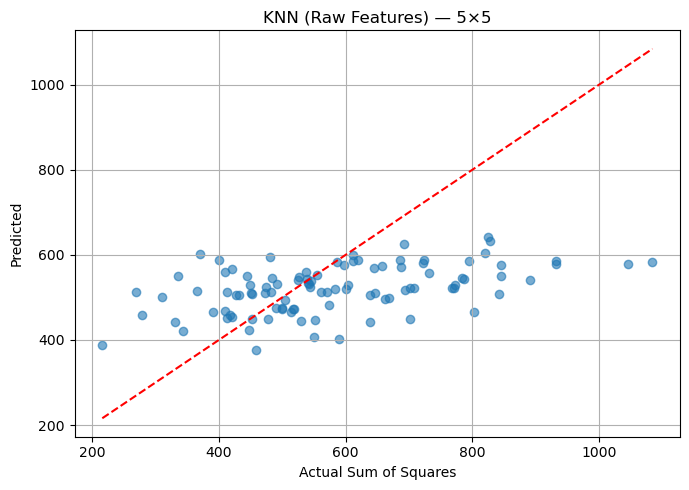

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

train_df = pd.read_csv('train_5x5_eigen_data.csv')
test_df = pd.read_csv('test_5x5_eigen_data.csv')

feature_cols = list("abcdefghijklmnopqrstuvwxyz")[:25]
X_train = train_df[feature_cols]
y_train = train_df['sum_squared']
X_test = test_df[feature_cols]
y_true = test_df['sum_squared']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

grid = GridSearchCV(KNeighborsRegressor(), {'n_neighbors': list(range(1, 21))}, 
                    scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train_scaled, y_train)
best_k = grid.best_params_['n_neighbors']
print(f"Best K (raw): {best_k}")

knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print(f"\nKNN (Raw) — MSE: {mse:.2f}, R²: {r2:.4f}")

test_df['predicted_sum_squared'] = y_pred
test_df.to_csv('test_5x5_eigen_data.csv', index=False)

plt.figure(figsize=(7, 5))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("Actual Sum of Squares")
plt.ylabel("Predicted")
plt.title("KNN (Raw Features) — 5×5")
plt.grid(True)
plt.tight_layout()
plt.show()


Best K (enhanced): 11

KNN (Enhanced) — MSE: 23130.81, R²: 0.2029


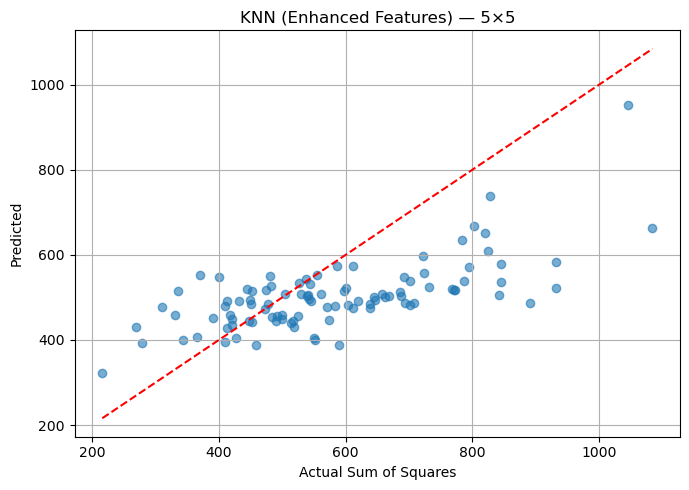

In [6]:
import numpy as np

def add_features(df):
    df['trace'] = df['a'] + df['g'] + df['m'] + df['s'] + df['y']
    
    def symmetry_score(row):
        mat = np.array([
            [row['a'], row['b'], row['c'], row['d'], row['e']],
            [row['f'], row['g'], row['h'], row['i'], row['j']],
            [row['k'], row['l'], row['m'], row['n'], row['o']],
            [row['p'], row['q'], row['r'], row['s'], row['t']],
            [row['u'], row['v'], row['w'], row['x'], row['y']]
        ])
        score = 0
        for i in range(5):
            for j in range(i + 1, 5):
                score += abs(mat[i][j] - mat[j][i])
        return score

    def det_5x5(row):
        mat = np.array([
            [row['a'], row['b'], row['c'], row['d'], row['e']],
            [row['f'], row['g'], row['h'], row['i'], row['j']],
            [row['k'], row['l'], row['m'], row['n'], row['o']],
            [row['p'], row['q'], row['r'], row['s'], row['t']],
            [row['u'], row['v'], row['w'], row['x'], row['y']]
        ])
        return np.linalg.det(mat)

    df['sym_score'] = df.apply(symmetry_score, axis=1)
    df['det'] = df.apply(det_5x5, axis=1)
    return df

train_df = add_features(pd.read_csv('train_5x5_eigen_data.csv'))
test_df = add_features(pd.read_csv('test_5x5_eigen_data.csv'))

feature_cols = list("abcdefghijklmnopqrstuvwxyz")[:25] + ['trace', 'sym_score', 'det']
X_train = train_df[feature_cols]
y_train = train_df['sum_squared']
X_test = test_df[feature_cols]
y_true = test_df['sum_squared']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

grid = GridSearchCV(KNeighborsRegressor(), {'n_neighbors': list(range(1, 21))},
                    scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train_scaled, y_train)
best_k = grid.best_params_['n_neighbors']
print(f"Best K (enhanced): {best_k}")

knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print(f"\nKNN (Enhanced) — MSE: {mse:.2f}, R²: {r2:.4f}")

test_df['predicted_sum_squared'] = y_pred
test_df.to_csv('test_5x5_eigen_data.csv', index=False)

plt.figure(figsize=(7, 5))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("Actual Sum of Squares")
plt.ylabel("Predicted")
plt.title("KNN (Enhanced Features) — 5×5")
plt.grid(True)
plt.tight_layout()
plt.show()
